<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">


# <center> Проект: Анализ вакансий на hh.ru

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

##### Размерность таблицы

In [2]:
data_hh = pd.read_csv("dst-3.0_16_1_hh_database.csv", sep=';')
display((data_hh.shape[0], data_hh.shape[1]))

(44744, 12)

##### Знакомимся со структурой данных

In [3]:
display(data_hh.head(2), data_hh.tail(2))


Пол, возраст          ЗП  \
0  Мужчина ,  39 лет , родился 27 ноября 1979  29000 руб.   
1   Мужчина ,  60 лет , родился 20 марта 1959  40000 руб.   

  Ищет работу на должность:  \
0   Системный администратор   
1      Технический писатель   

                        Город, переезд, командировки  \
0  Советск (Калининградская область) , не готов к...   
1  Королев , не готов к переезду , готов к редким...   

                                           Занятость  \
0  частичная занятость, проектная работа, полная ...   
1  частичная занятость, проектная работа, полная ...   

                                              График  \
0  гибкий график, полный день, сменный график, ва...   
1  гибкий график, полный день, сменный график, уд...   

                                         Опыт работы  \
0  Опыт работы 16 лет 10 месяцев  Август 2010 — п...   
1  Опыт работы 19 лет 5 месяцев  Январь 2000 — по...   

  Последнее/нынешнее место работы  \
0         МАОУ "СОШ № 1 г.Немана"   
1    Временный трудовой коллектив   

                       Последняя/нынешняя должность  \
0                           Системный администратор   
1  Менеджер проекта, Аналитик, Технический писатель   

                                   Образование и ВУЗ Обновление резюме  \
0  Неоконченное высшее образование 2000  Балтийск...  16.04.2019 15:59   
1  Высшее образование 1981  Военно-космическая ак...  12.04.2019 08:42   

                             Авто  
0  Имеется собственный автомобиль  
1                      Не указано

Пол, возраст           ЗП  \
44742  Мужчина ,  24 года , родился 6 октября 1994   20000 руб.   
44743   Мужчина ,  38 лет , родился 25 апреля 1980  120000 руб.   

      Ищет работу на должность:  \
44742          Контент-менеджер   
44743      Руководитель проекта   

                            Город, переезд, командировки  \
44742  Тамбов , не готов к переезду , не готов к кома...   
44743  Москва , не готов к переезду , не готов к кома...   

                                   Занятость            График  \
44742  частичная занятость, полная занятость  удаленная работа   
44743                       полная занятость       полный день   

                                             Опыт работы  \
44742  Опыт работы 3 года 10 месяцев  Контент-менедже...   
44743  Опыт работы 15 лет 10 месяцев  Руководитель пр...   

      Последнее/нынешнее место работы  \
44742                       IQ-Maxima   
44743               ПАО ГК ТНС энерго   

                    Последняя/нынешняя должность  \
44742                          Менеджер проектов   
44743  Руководитель отдела технической поддержки   

                                       Образование и ВУЗ Обновление резюме  \
44742  Высшее образование 2015  Тамбовский государств...  26.04.2019 14:25   
44743  Высшее образование 1997  Южно-Российский госуд...  05.07.2018 20:15   

                                 Авто  
44742  Имеется собственный автомобиль  
44743                      Не указано

##### Основная информация

In [4]:
inf = data_hh.info()
display(inf)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

None

##### Статистическая информация

In [5]:
work_experience = data_hh['Опыт работы'].describe()
display(work_experience)

job_title = data_hh['Ищет работу на должность:'].describe()
display(job_title)

count                                                 44576
unique                                                44413
top       Опыт работы 10 лет 8 месяцев  Апрель 2018 — по...
freq                                                      3
Name: Опыт работы, dtype: object

count                       44744
unique                      14929
top       Системный администратор
freq                         3099
Name: Ищет работу на должность:, dtype: object

# Преобразование данных

##### Преобразование признака 'Образование и ВУЗ'

In [6]:
# Создаём новую колонку по ключевым словам из признака 'Образование и ВУЗ'
lis = list()

# функция добавляет ключевые слова в список
def func_education(x):
    if x.split(' ')[0] == 'Высшее':
        lis.append('высшее')
        
    elif x.split(' ')[0] == 'Неоконченное':
        lis.append('неоконченное высшее')
        
    elif x.split(' ')[1] == 'специальное':
        lis.append('среднее специальное')
        
    elif x.split(' ')[0] == 'Среднее':
        lis.append('среднее')
        
        
data_hh['Образование и ВУЗ'].apply(func_education)
data_hh['Образование'] = pd.Series(lis) 
# добавляем новый признак

data = data_hh.drop('Образование и ВУЗ', axis=1) 
# удаляем из таблицы признак 'Образование и ВУЗ'

display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Обновление резюме                44744 non-null  object
 10  Авто                             44744 non-null  object
 11  Образование                      44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

None

##### Преобразование признака "Пол, возраст"

In [7]:
gender = []
age = []

def gender_edge(x):
    
    gender.append(
        ''.join(x.split(','))[0]
        )    
    age.append(int(
            ''.join(x.split(',')[1])[2:4]
        ))
data['Пол, возраст'].apply(gender_edge)

data['Пол'] = pd.Series(gender)
data['Возраст'] = pd.Series(age)

data_1 = data.drop('Пол, возраст', axis=1)
display(data_1['Пол'].value_counts(normalize=True), data_1['Возраст'].mean())
display(data_1.info())

М    0.809293
Ж    0.190707
Name: Пол, dtype: float64

32.19473001966744

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   ЗП                               44744 non-null  object
 1   Ищет работу на должность:        44744 non-null  object
 2   Город, переезд, командировки     44744 non-null  object
 3   Занятость                        44744 non-null  object
 4   График                           44744 non-null  object
 5   Опыт работы                      44576 non-null  object
 6   Последнее/нынешнее место работы  44743 non-null  object
 7   Последняя/нынешняя должность     44742 non-null  object
 8   Обновление резюме                44744 non-null  object
 9   Авто                             44744 non-null  object
 10  Образование                      44744 non-null  object
 11  Пол                              44744 non-null  object
 12  Возраст                         

None

##### Преобразование признака «Опыт работы»

In [8]:
def experience_mounth(x):
    if x is np.nan or x == 'Не указано':
        return None
    years = ['год', 'года', 'лет']
    month = ['месяц', 'месяца', 'месяцев']
    arg_splitted = str(x).split(' ')[:6]
    counter = 0
    
    for index, value in enumerate(arg_splitted):
        if value in years:
            counter = int(arg_splitted[index-1]) *12
        
        if value in month:
            counter += int(arg_splitted[index-1])
    return counter

data_1['Опыт работы (месяц)'] = data_1['Опыт работы'].apply(experience_mounth)
data_2 = data_1.drop('Опыт работы', axis=1)
data_2['Опыт работы (месяц)']

0        202.0
1        233.0
2        123.0
3        225.0
4         67.0
         ...  
44739     91.0
44740     84.0
44741    257.0
44742     46.0
44743    190.0
Name: Опыт работы (месяц), Length: 44744, dtype: float64

##### Преобразование признака 'Город, переезд, командировки'

In [9]:
# Функция создаёт новый признак "Город"
def citi(x):
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск',
                  'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград' ]
    main_citis = ['Москва', 'Санкт-Петербург']
    arg_splited = x.split(' ')[0]
    
    if arg_splited in million_cities:
        return 'город-миллионник'
    if arg_splited in main_citis:
        return arg_splited
    return 'другие'
data_2['Город'] = data_2['Город, переезд, командировки'].apply(citi)


# Функция создаёт признак "Готовность к переезду"
def moving(x):
    lis_false = ['не готов к переезду', 'не готова к переезду']
    arg_splited = x.split(' , ')[:3]

    for value in arg_splited:
        if value in lis_false:
            return False
    return True
data_2['Готовность к переезду'] = data_2['Город, переезд, командировки'].apply(moving)


# Функция создаёт признак "Готовность к командировкам" 
def business_trip(x):
    arg_splited = x.split(' , ')[-1]
    lis = ['не готова к командировкам', 'не готов к командировкам']
    
    if (arg_splited in lis) or ((arg_splited is None) or (arg_splited is np.nan)):
        return False
    return True
data_2['Готовность к командировкам'] = data_2['Город, переезд, командировки'].apply(business_trip)

data_3 = data_2.drop('Город, переезд, командировки', axis=1)
mask_city = data_3['Город'] == "Санкт-Петербург"
print(mask_city.value_counts(normalize=True)*100)
mask = data_3['Готовность к переезду'] & data_3['Готовность к командировкам']
print(data_3[mask].shape[0] / data_3.shape[0] *100)

False    88.966118
True     11.033882
Name: Город, dtype: float64
32.03558018952262


##### Преобразование признаков "Занятость" и "График"

In [10]:
# Метод преобразования категориальных признаков One Hot Encoding (признак-мигалка)
employments = ['полная занятость', 'частичная занятость', 
               'проектная работа', 'волонтерство', 'стажировка']
schedule = ['полный день', 'сменный график', 'гибкий график',
            'удалённая работа', 'вахтовый метод']
for value in employments:
    data_3[value] = data_3['Занятость'].apply(lambda x: value in x)
for value in schedule:
    data_3[value] = data_3['График'].apply(lambda x: value in x)

mask_emp = data_3['проектная работа'] & data_3['волонтерство']
mask_sch = data_3['вахтовый метод'] & data_3['гибкий график']
print(data_3[mask_emp].shape[0])
print(data_3[mask_sch].shape[0])
data_4 = data_3.drop('Занятость', axis=1)
data_5 = data_4.drop('График', axis=1)

436
2311


##### Преобразование признака "ЗП"

In [11]:
rates_0 = pd.read_csv('ExchangeRates.csv')
rates = rates_0.drop(['per','time', 'vol'], axis=1)

#форматируем дату в столбцах ,format='%Y/%d/%m'
rates['date'] = pd.to_datetime(rates['date'], dayfirst=True).dt.date
data_5['Обновление резюме'] = pd.to_datetime(data_5['Обновление резюме'], dayfirst=True).dt.date

# создаём столбцы с названием валюты и желаемой зп
data_5['курс'] = data_5['ЗП'].apply(lambda x: str(x.split(' ')[1]))
data_5['желаемая ЗП'] = data_5['ЗП'].apply(lambda y: y.split(' ')[0])

#Переводим наименование курса в ISO
currency_dict = {
        'USD': 'USD', 'KZT': 'KZT',
        'грн': 'UAH', 'белруб': 'BYN',
        'EUR': 'EUR', 'KGS': 'KGS',
        'сум': 'UZS', 'AZN': 'AZN', 'руб': 'RUB'
    }
def iso(x):
    for i in currency_dict:
        if i in x.replace('.', ''):
            return currency_dict[i]

data_5['курс'] = data_5['курс'].apply(iso)

# соединим таблицы data_5 и rates
data_rates = data_5.merge(right = rates,
                         how = 'left',
                         right_on= ['date','currency'],
                         left_on= ['Обновление резюме','курс']
                         )

values = {
    'close': int(1),
    'proportion': int(1)
    }
#заполняем пропуски в соответствии с заявленным словарем
data_rates = data_rates.fillna(values)

data_rates['желаемая ЗП'] = data_rates['желаемая ЗП'].apply(lambda x: int(x))
data_rates['ЗП (руб)'] = data_rates['желаемая ЗП'] * data_rates['close'] / data_rates['proportion']
display(data_rates['ЗП (руб)'].median())
data_6 = data_rates.drop(['курс', 'желаемая ЗП', 'currency', 'date', 'close', 'proportion'], axis=1)

59019.0

# Исследование зависимостей в данных

#### Распределение признака «Возраст»

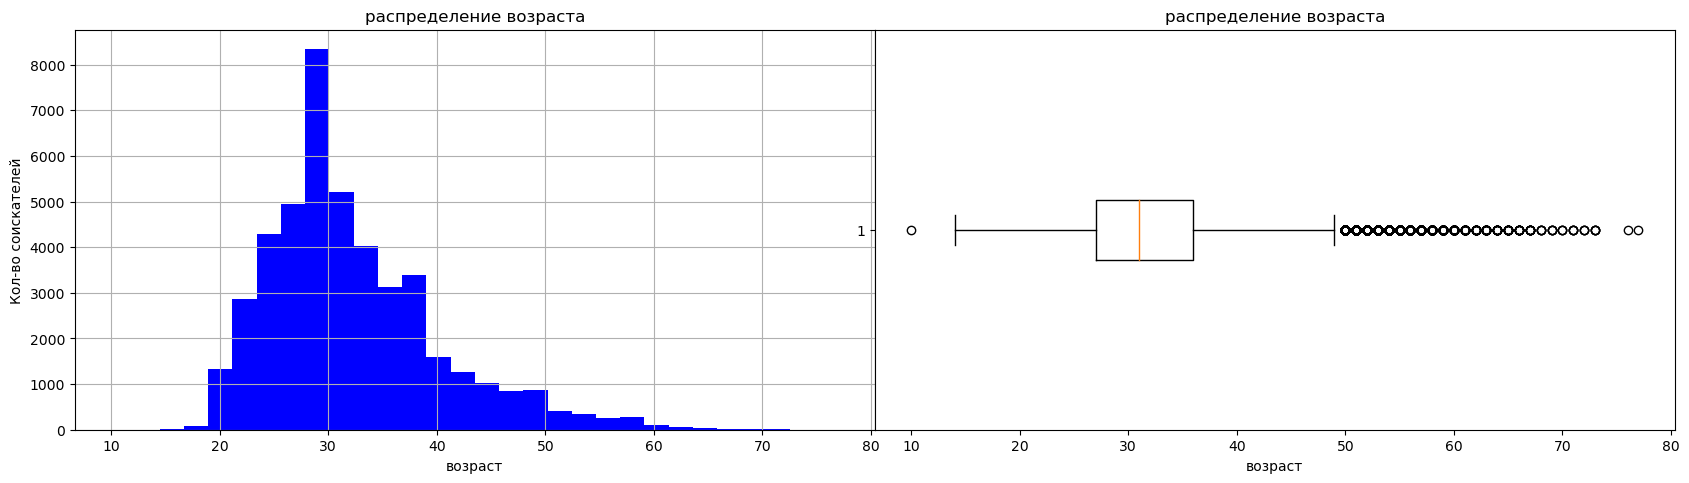

In [12]:
fig = plt.figure(figsize=(8,4))
axes = fig.add_axes([0,0,1,1])
axes.hist(
    x= data_6['Возраст'],
    bins= 30,
    color= 'blue'
);
axes.set_xlabel('возраст');
axes.set_ylabel('Кол-во соискателей');
axes.set_title('распределение возраста');
axes.grid()

# Добавим на плоскость фигуру с графиком 
axes_box = fig.add_axes([1,0,1,1])
axes_box.boxplot(
    x= data_6['Возраст'],
    vert= False
);
axes_box.set_title('распределение возраста');
axes_box.set_xlabel('возраст');



# График plotly с двумя рафиками
fig_hist = px.histogram(
    data_frame=data_6,
    x='Возраст',
    title='Распределение возраста соискателей',
    histnorm='percent',
    width=500,
    marginal='box',
)
fig_hist.show()

1. Из графика следует, что соискателей с возрастом от 25 до 30 лет наибольшее кол-во.
Меньше всего соискателей с возрастом более 60 лет.
По второму графику наблюдаются выбросы после возраста в 50 лет. Наиболее явными выбросами являются возраста 14, и после 70

#### Распределение признака «Опыт работы (месяц)»

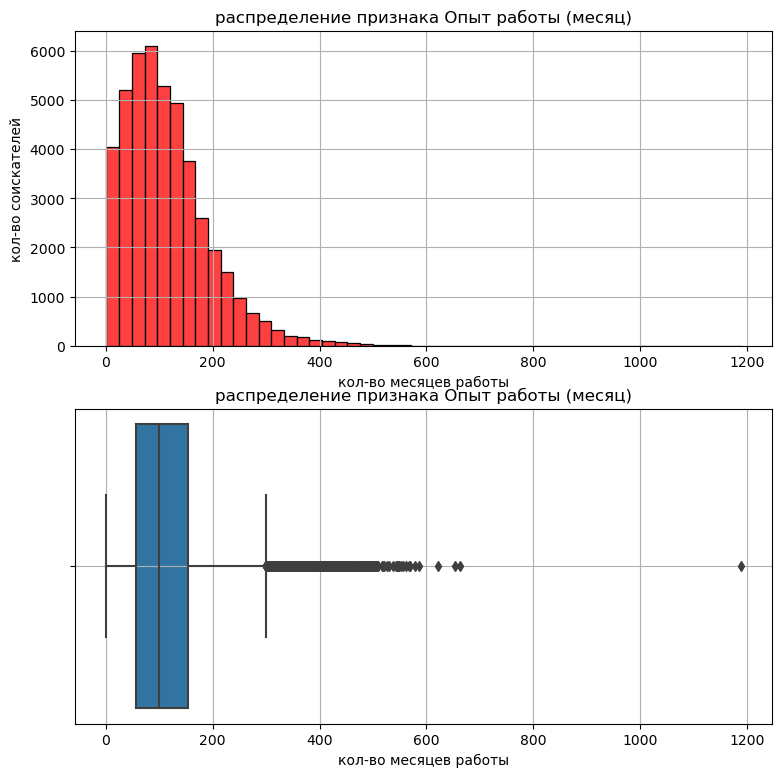

In [13]:
fig, axes = plt.subplots(nrows= 2,ncols= 1, figsize= (9,9))
sns.histplot(data= data_6,
    x= 'Опыт работы (месяц)',
    bins= 50,
    color= 'red',
    ax= axes[0]);
axes[0].set_title('распределение признака Опыт работы (месяц)');
axes[0].set_xlabel('кол-во месяцев работы');
axes[0].set_ylabel('кол-во соискателей');
axes[0].grid()

sns.boxplot(data= data_6,
            x= 'Опыт работы (месяц)',
            orient= 'h',
            width= 0.9,
            ax= axes[1]
            );
axes[1].set_title('распределение признака Опыт работы (месяц)');
axes[1].set_xlabel('кол-во месяцев работы');
axes[1].grid()



# График с plotly
fig_hist= px.histogram(data_frame= data_6,
                       x= 'Опыт работы (месяц)',
                       title= 'Распределение возраста соискателей',
                       histnorm='percent',
                       width=500,
                       marginal='box',
                       );
fig_hist.show()

2. Из графиков видно, что модой является знаячения в 80-84 месяца опыта работы.
Минимальный опыт работы составляет от 0 до 4 месяцев, максимальный - 1188.
Основной диапазон соискателей имеет опыт от 56 до 154 месяцев.
Также можем наблюдать анамальные значения в опыте свыше 302 месяцев, еще более явные - свыше 500 месяцев.

#### Распределение признака «ЗП (руб)»

In [14]:
hist_plot = px.histogram(data_frame= data_6,
                         x= 'ЗП (руб)',
                         histnorm='percent',
                         title= 'распределение признака ЗП (руб)',
                         width= 1000,
                         marginal= 'box'
                         );
hist_plot.show()

3. Самой частовстречающейся является зп приблизительно 50к. Минимальная зп равна 2500р, максимальная - 24млн. Большинство ожидаемых зп находится в итервале от 37к до 95к. На графике видны выраженные аномалии с уровнем зп свыше 400к.

#### Зависимость медианного значения признака «ЗП (руб)» от признака «Образование».

In [15]:
mask_salary = data_6[data_6['ЗП (руб)'] < 1000000.0]
group = mask_salary.groupby(by= 'Образование', as_index=False)['ЗП (руб)'].median() # as_index=False 
#plotly express работает только с DataFrame, а не с Series
print(group)
salary_eduction = px.bar(data_frame= group,
       x= 'Образование',
       y= 'ЗП (руб)',
       title= 'Зависимость ЗП от Образования (медианное значение)',
       color= 'Образование',
       height= 500,
       width= 1000)
salary_eduction.show()

           Образование  ЗП (руб)
0               высшее   60000.0
1  неоконченное высшее   50000.0
2              среднее   40000.0
3  среднее специальное   40000.0


4. У соискателей с высшим образованием желаемая зп выше остальных, в то время как со средним и средним специальным самые низкие желаемые зп.
Признак оброзования показывает наличие у будущего кандидата необходимых знаний в работе и важен при прогнозировании желаемой зп. Так же высшее образование может говорить о таких личных чертах, как целеустремленность, хорошая мотивация, навык справляться с трудными задачами, способность к обучению и тп.

#### Распределение признаков «ЗП (руб)» в зависимости от «Город»

In [16]:
box_data = data_6[data_6['ЗП (руб)']< 1e6]
city_salary = px.box(data_frame= box_data,
       x= 'Город',
       y= 'ЗП (руб)',
       color= 'Город',
       title= 'Зависимость признаков «ЗП (руб)» и «Город»',
       height= 500,
       width= 1000)
city_salary.show()

5. Города миллионники близки по графику с Санкт-Петербургом, медианное значение имеет разницу в 20к. Самый большой разброс в желаемой зп 
у Москвы, также ее медиана является самой выскокой среди других городов.
Признак города играет существенную роль в распределении уровня желаемой зп. Например, в больших городах спрос и предложение на работу всегда выше, чем в маленьких. 

#### Зависимость медианной заработной платы от признаков «Готовность к переезду» и «Готовность к командировкам».

Готовность к переезду  Готовность к командировкам  ЗП (руб)
0                  False                       False   40000.0
1                  False                        True   60000.0
2                   True                       False   50000.0
3                   True                        True   67000.0

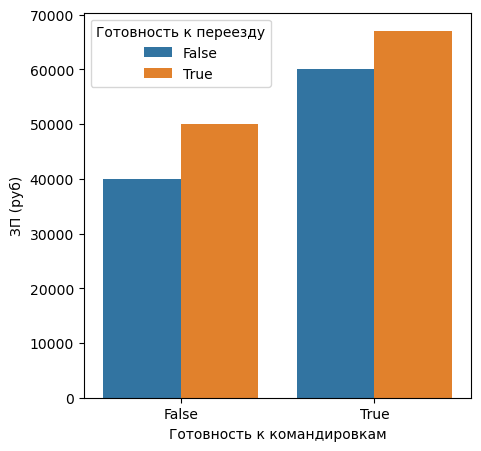

In [17]:
group_data = data_6.groupby(
    by= ['Готовность к переезду','Готовность к командировкам'], 
    as_index= False
    )['ЗП (руб)'].median()
display(group_data)

fig = plt.figure(figsize= (5,5))
bar_data = sns.barplot(data= group_data,
                       x= 'Готовность к командировкам',
                       y= 'ЗП (руб)',
                       hue='Готовность к переезду')

bar = px.bar(data_frame= group_data,
             x= 'Готовность к переезду',
             y= 'ЗП (руб)',
             color='Готовность к командировкам',
             orientation= 'v',
             barmode="group", # полосы располагаются рядом друг с другом
             title= 'Зависимость зп от признаков «Готовность к переезду» и «Готовность к командировкам».')
bar.show()

6. Соискателей готовых и к командировкам и к переезду меньшинство, что объясняет желаемую зп выше остальных. Кандидаты неготовоые к командировкам и переездам желаемая зп самая низкая, поскольку они могут работать только из одного конкретного места. 
Также можно увидеть, что соискатели ставят желаемую зп выше за готовность к командировкам, чем за готовность к пеездам.


#### Зависимость медианной желаемой заработной платы от возраста и образования.

In [18]:
table = data_6.pivot_table(index= 'Образование', 
                           columns= 'Возраст', 
                           values= 'ЗП (руб)', 
                           aggfunc='median', 
                           fill_value=0)
display(table)
hot_map = px.imshow(img = table,
                    title= 'Желаемая ЗП по возрасту и образованию',
                    color_continuous_scale='reds',
)
hot_map.show()

Возраст                 10     14     15         16       17     18     19  \
Образование                                                                  
высшее                   0  60000      0  122582.49  90075.5  30000  30000   
неоконченное высшее      0      0      0       0.00  80000.0  25000  30000   
среднее                  0      0  10000       0.00  44000.0  35000  45000   
среднее специальное  60000      0   2000   30000.00  25000.0  25151  30000   

Возраст                 20     21     22  ...     66      67     68      69  \
Образование                               ...                                 
высшее               30000  35000  40000  ...  65000   70000  79000  112500   
неоконченное высшее  31000  35000  40000  ...      0       0      0       0   
среднее              29000  40000  40000  ...      0       0      0       0   
среднее специальное  30000  30000  30000  ...      0  120000      0       0   

Возраст                 70     71     72     73     76     77  
Образование                                                    
высшее               80000  75000  75000  62500  45000  90000  
неоконченное высшее      0      0      0      0      0      0  
среднее                  0      0      0      0      0      0  
среднее специальное      0      0      0      0      0      0  

[4 rows x 63 columns]

7. Группа соискателей в возрасте от 16 до 18 лет с высшим образованием наиболее требовательна (скорее всего это выбросы, поскольку в 16 лет высшее образование получить очень сложно). Также резюме с возрастом от 20 до 50 лет имеют указанные желаемые зп выше там, где указанно высшее образование. Самые низкие требования по зп у соискателей со средним специальным образованием. 
В группе с возрастом от 19 до 30 самые низкие ожидаемые зп.

#### Зависимость опыта работы от возраста.

In [19]:
#example_one
copy_data = data_6.copy()

copy_data['years_exaption'] = round(copy_data['Опыт работы (месяц)']/12)
scat_one = px.scatter(data_frame= copy_data,
                  x= 'years_exaption',
                  y= 'Возраст',
                  title= 'Опыт работы к возрасту')
# построение прямой
scat_one.update_layout(shapes=[
    dict(
      type= 'line',
      xref= 'paper', x0= 0, x1= 0.9,
      yref= 'y', y0= 0, y1= 100,
    ),])
scat_one.show()

7

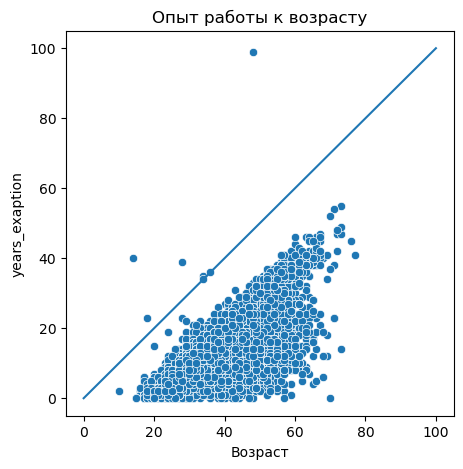

In [20]:
#example_two
fig = plt.figure(figsize=(5,5))
sns.lineplot(x= [0,100],y= [0,100])
scat = sns.scatterplot(data= copy_data,
                       x= 'Возраст',
                       y= 'years_exaption');
scat.set_title('Опыт работы к возрасту');


mask = copy_data['years_exaption'] >= copy_data['Возраст']
display(copy_data[mask].shape[0])

8. Можно заметить аномалии на интерактивном графике, где возраст соискателя близок к опыту работы. Например: возраст=20лет а опыт=15лет - такая ситуация, 
в которой человек должен был начать работать с 5 лет, очень маловероятна. 

#### (доп.) Зависимость ЗП (руб) от Пола

In [21]:
group_gender = data_6.pivot_table(columns= 'Пол',
                                  values= 'ЗП (руб)',
                                  index= "Опыт работы (месяц)")

group_gender['Ж'] = group_gender['Ж'].fillna(group_gender['Ж'].median())
group_gender['М'] = group_gender['М'].fillna(group_gender['М'].median())

gender = px.scatter(data_frame= group_gender,
                    title= 'Взаимосвязь ЗП и пола',
                    color= 'Пол')
gender.show()

На графике видно разницу в ожидаемых зарплатах - мужчины ставят ЗП выше, чем женщины с таким же опытом работы.

#### (доп) Зависимость возраста от готовности к командировкам и образования 

In [22]:
gr = data_6.groupby(by= ['Готовность к командировкам', 'Образование'], as_index= False)['Возраст'].mean()
age_moviment = px.bar(data_frame= gr,
                      x= 'Готовность к командировкам',
                      y= 'Возраст',
                      color= 'Образование',
                      orientation= 'v',
                      barmode="group")
age_moviment.show()

Средний возраст соискателей, готовых к командировкам, выше, чем у тех, кто не готов к командировкам.
Эта зависимость наблюдается в резюме с каждым из четырёх видов образования.

# Очистка данных

#### Поиск дубликатов

In [23]:
data_clean = data_6.copy()

col = list(data_clean.columns)
mask = data_clean.duplicated(subset=col)
print(f'найден {data_clean[mask].shape[0]} дубликат')
data_clean = data_clean.drop_duplicates(subset=col)

найден 161 дубликат


#### Поиск и обработка пропусков 

In [24]:
mask_bool = data_clean.isnull().sum()
display(mask_bool[mask_bool>0])

Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Опыт работы (месяц)                168
dtype: int64

In [25]:
# заполняем пропуски в признаке 'Опыт работы (месяц)'
fill_data = data_clean.copy()
dic = {'Опыт работы (месяц)': fill_data['Опыт работы (месяц)'].median()}
fiil_data = fill_data.fillna(dic)
display(round(fiil_data['Опыт работы (месяц)'].mean()))

# удаление оставшихся пропусков
rows = fill_data.shape[1] 
fill_data = fill_data.dropna(thresh=rows, axis=0)

# более короткий способ
#data = data.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])
#data['Опыт работы (месяц)'] = data['Опыт работы (месяц)'].fillna(data['Опыт работы (месяц)'].median())

114

#### Поиск и ликвидация выбросов

In [26]:
# Убираем записи с ЗП выше 1млн и ниже 1к
mask = fill_data[(1e3 > fill_data['ЗП (руб)']) | (1e6 < fill_data['ЗП (руб)'])]
data_outliers = fill_data.drop(mask.index, axis=0)
display(mask.shape[0])

87

In [27]:
# удаляем резюме, в которых опыт работы больше возраста 
mask_age = data_outliers[data_outliers['Опыт работы (месяц)']/12 >= data_outliers['Возраст']]
data_outliers = data_outliers.drop(mask_age.index, axis=0)
display(mask_age)

ЗП        Ищет работу на должность:  \
4535    15000 руб.           Технический специалист   
19351   20000 руб.  Специалист (Junior-программист)   
19872   25000 грн.                         Аналитик   
26477   80000 руб.             Менеджер IT-проектов   
29098   60000 руб.      Ведущий инженер-программист   
40015   60000 руб.  Системный администратор Windows   
43451  200000 руб.   Руководитель отдела разработки   

                         Последнее/нынешнее место работы  \
4535                                                   а   
19351                                  Русский свет, ООО   
19872                                           Kyivstar   
26477  М©й IT'M  ("Информационные Технологии' Менеджм...   
29098                           КБ Аметист, Концерн АГАТ   
40015                                     АО ТК Горизонт   
43451                                              ЛАНИТ   

                     Последняя/нынешняя должность Обновление резюме  \
4535                                            а        2019-04-11   
19351                                    Электрик        2019-04-26   
19872            Фахівець з опису бізнес процесів        2019-04-26   
26477                                  Основатель        2019-04-08   
29098                 Ведущий инженер-программист        2019-04-26   
40015  Начальник отдела информационных технологий        2019-04-16   
43451                        Руководитель проекта        2018-08-17   

             Авто          Образование Пол  Возраст  Опыт работы (месяц)  ...  \
4535   Не указано  среднее специальное   Ж       18                271.0  ...   
19351  Не указано               высшее   М       28                470.0  ...   
19872  Не указано               высшее   М       34                416.0  ...   
26477  Не указано               высшее   М       34                411.0  ...   
29098  Не указано               высшее   М       14                477.0  ...   
40015  Не указано               высшее   М       48               1188.0  ...   
43451  Не указано               высшее   М       36                434.0  ...   

      частичная занятость  проектная работа  волонтерство  стажировка  \
4535                 True              True         False       False   
19351               False             False         False       False   
19872               False             False         False       False   
26477                True              True          True        True   
29098               False             False         False       False   
40015                True             False         False       False   
43451               False             False         False       False   

       полный день  сменный график  гибкий график  удалённая работа  \
4535         False            True          False             False   
19351         True           False          False             False   
19872         True           False          False             False   
26477         True            True           True             False   
29098         True           False          False             False   
40015         True           False           True             False   
43451         True           False          False             False   

       вахтовый метод  ЗП (руб)  
4535            False   15000.0  
19351           False   20000.0  
19872           False   60740.5  
26477            True   80000.0  
29098           False   60000.0  
40015            True   60000.0  
43451           False  200000.0  

[7 rows x 24 columns]

152      72
850      71
1430     64
2106     68
3271     64
         ..
40994    64
43381    68
44363    70
44414    65
44725    68
Name: Возраст, Length: 80, dtype: int64

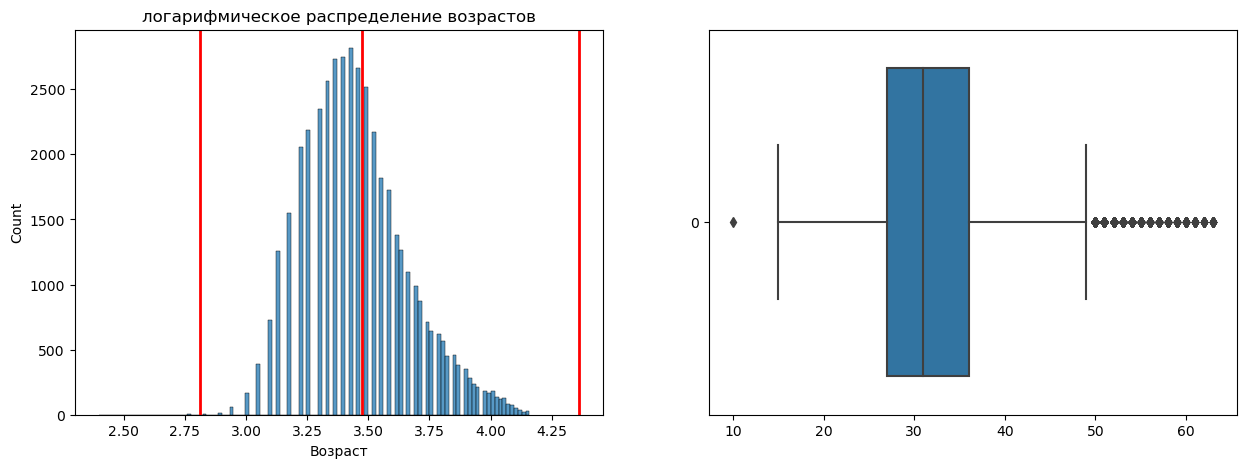

In [40]:
# Выявление выбросов в признаке 'Возраст' с помощью метода "3-х сигм"
def three_sigms(data, feature, log_scale=True, left=3, right=3):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    sigma= x.std()
    mu= x.mean()
    
    lower_bound = mu - left*sigma
    upper_bound = mu + right*sigma
    outliers = x[(x < lower_bound) | (x > upper_bound)]
    cleaner = x[(x > lower_bound) & (x < upper_bound)]
    display(outliers)
    return outliers, cleaner

outliers, cleaner = three_sigms(data_outliers, 'Возраст',log_scale=False, right=4)
#data_cleared = data_outliers.drop(outliers.index, axis=0)


# грфик распределения признака 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
box= sns.boxplot(data= cleaner,
             orient= 'h',
             ax= axes[1]);
log = np.log(cleaner+1)
hist = sns.histplot(data= log,
             ax= axes[0]);
hist.axvline(log.mean(), color='r', lw=2)
hist.axvline(log.mean() - 3*log.std(), color='r', lw=2)
hist.axvline(log.mean() + 4*log.std(),color='r', lw=2)
hist.set_title('логарифмическое распределение возрастов');

График имеет правостороннюю асимметрию. Основные показатели возраста, попадающие под выброс - примерно от 64 лет.
Основной возраст в резюме составляет примерно от 30 до 33 лет